In [298]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import seaborn as sns

In [299]:
# Для начала возьмем данные NASDAQ Composite (^IXIC) 08/03/20-08/03/21
ixic_df = pd.read_csv(r'^IXIC.csv')
ixic_df['Date'] = pd.to_datetime(ixic_df['Date'])
ixic_df['up/down'] = ixic_df.apply(lambda x: 'up' if x['Close'] > x['Open'] else 'down', axis=1)
ixic_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,up/down
0,2020-03-09,7957.930176,8243.309570,7943.160156,7950.680176,7950.680176,4530350000,down
1,2020-03-10,8219.759766,8347.400391,7930.430176,8344.250000,8344.250000,4431930000,up
2,2020-03-11,8136.250000,8181.359863,7850.950195,7952.049805,7952.049805,4273890000,down
3,2020-03-12,7398.580078,7712.330078,7194.669922,7201.799805,7201.799805,5066530000,down
4,2020-03-13,7610.390137,7875.930176,7219.089844,7874.879883,7874.879883,4685890000,up


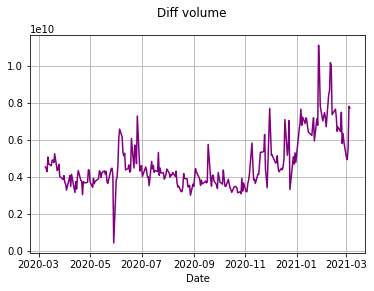

In [300]:
plt.plot(ixic_df['Date'], ixic_df['Volume'], c='purple')
plt.grid(True)
plt.suptitle('Diff volume')
plt.xlabel('Date')
plt.show()

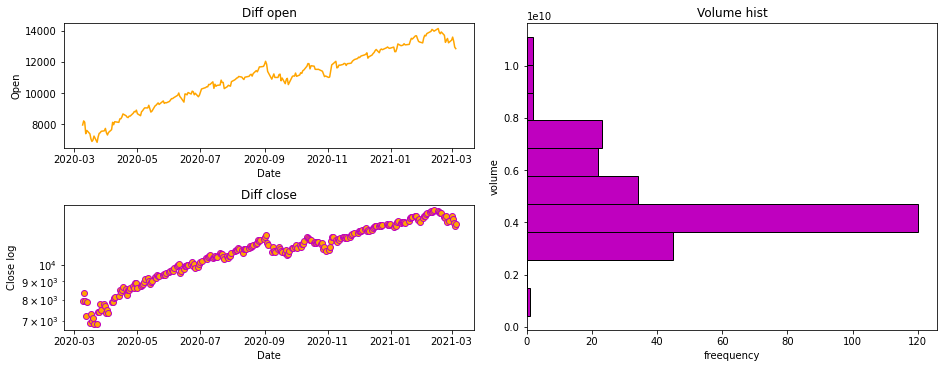

In [301]:
fig = plt.figure(constrained_layout=True, figsize=(13,5))
gs = gridspec.GridSpec(2, 2, figure=fig)

ax0 = fig.add_subplot(gs[0, :1])
ax0.plot(ixic_df['Date'], ixic_df['Open'], c ='orange')
ax0.set_xlabel('Date')
ax0.set_ylabel('Open')
ax0.set_title('Diff open')

ax1 = fig.add_subplot(gs[1, :1])
ax1.scatter(ixic_df['Date'], ixic_df['Close'], c = 'orange', edgecolor='m')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close log')
ax1.set_title('Diff close')
ax1.set_yscale('log')

ax2 = fig.add_subplot(gs[:, 1:])
ax2.hist(ixic_df['Volume'], orientation = 'horizontal',color='m',edgecolor='black')
ax2.set_title('Volume hist')
ax2.set_xlabel('freequency')
ax2.set_ylabel('volume')

plt.show()

array([[<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'High'}>]], dtype=object)

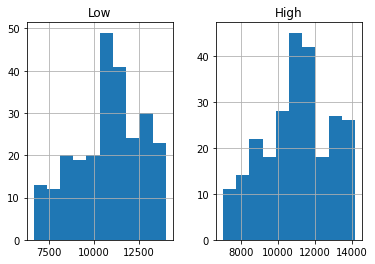

In [302]:
ixic_df[['Low', 'High']].hist()

<AxesSubplot:>

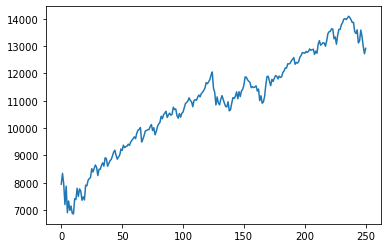

In [303]:
ixic_df['Adj Close'].plot()

<AxesSubplot:title={'center':'Open'}, xlabel='[up/down]'>

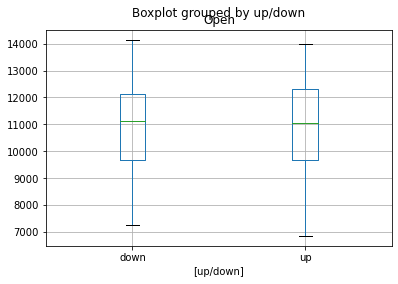

In [304]:
ixic_df[['Open','up/down']].boxplot(by='up/down')

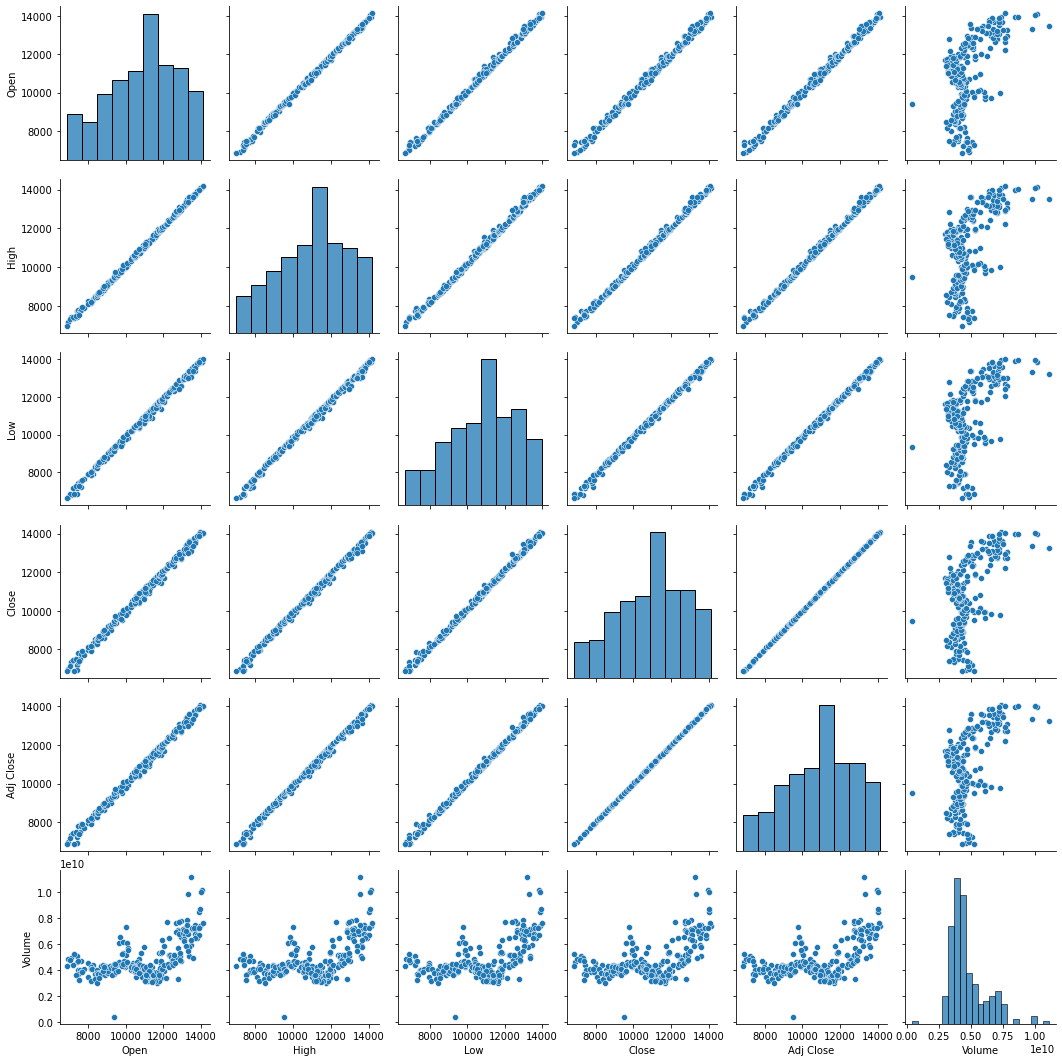

In [305]:
sns.pairplot(ixic_df)

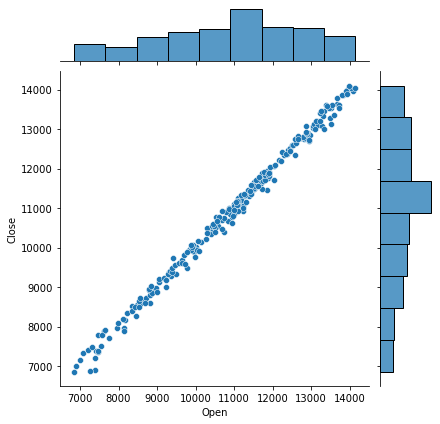

In [306]:
sns.jointplot(data=ixic_df, x='Open', y='Close')

<AxesSubplot:xlabel='up/down', ylabel='Close'>

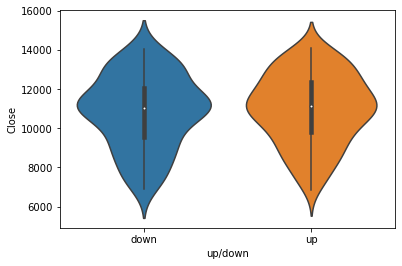

In [307]:
sns.violinplot(data=ixic_df, y='Close', x='up/down')

<AxesSubplot:>

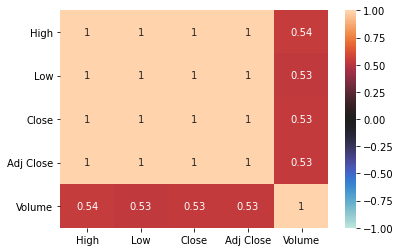

In [308]:
sns.heatmap(ixic_df.iloc[:,2:7].corr(), annot = True, vmin=-1, vmax=1, center= 0)

In [309]:
from scipy import stats

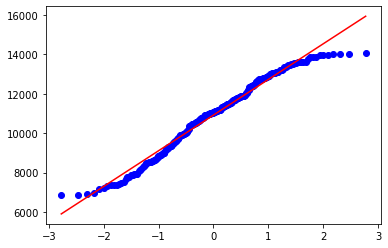

In [310]:
qq = stats.probplot(ixic_df['Close'], plot=sns.mpl.pyplot)